![wine%20quality%20dataset%20image.jpg](attachment:wine%20quality%20dataset%20image.jpg)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

### The Data
The dataset was generated using Wine Quality dataset. The task is to predict the right Quality which is an ordinal column.

Some key aspects are:

* Feature distributions are close to, but not exactly the same, as the original.
* We can use the original dataset as part of data augmentation.
* It is a fairly light dataset, so we can use lots of algorithms.
* The problem is framed as an ordinal regression, although it can be framed as a classification problem.

#### Columns description taken from this link:

Number of Attributes: 11 + output attribute Input variables (based on physicochemical tests):

* fixed acidity (tartaric acid -  g/dm3) most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* volatile acidity (acetic acid -  g/dm3) the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* citric acid ( g/dm3) found in small quantities, citric acid can add ‘freshness’ and flavor to wines
* residual sugar ( g/dm3) the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* chlorides (sodium chloride -  g/dm3) the amount of salt in the wine
* free sulfur dioxide ( mg/dm3) the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
* total sulfur dioxide ( mg/dm3 ) amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* density ( g/cm3) the density of water is close to that of water depending on the percent alcohol and sugar content
* pH describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
* sulphates (potassium sulphate -  g/dm3) a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* alcohol (% by volume) the percent alcohol content of the wine

Output variable (based on sensory data):

* quality (score between 0 and 10)

In [6]:
train_df=pd.read_csv("train.csv",index_col=0)
test_df=pd.read_csv("test.csv",index_col=0)

original_df=pd.read_csv("WineQT.csv")

In [7]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [8]:
train_df.columns = train_df.columns.str.replace(' ', '_')
original_df.columns = original_df.columns.str.replace(' ', '_')
test_df.columns = test_df.columns.str.replace(' ', '_')

features = train_df.columns[:-1]

In [9]:
train_df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7


### EDA

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2056 non-null   float64
 1   volatile_acidity      2056 non-null   float64
 2   citric_acid           2056 non-null   float64
 3   residual_sugar        2056 non-null   float64
 4   chlorides             2056 non-null   float64
 5   free_sulfur_dioxide   2056 non-null   float64
 6   total_sulfur_dioxide  2056 non-null   float64
 7   density               2056 non-null   float64
 8   pH                    2056 non-null   float64
 9   sulphates             2056 non-null   float64
 10  alcohol               2056 non-null   float64
 11  quality               2056 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 208.8 KB


In [11]:
train_df.shape,original_df.shape

((2056, 12), (1143, 13))

#### Insights:

* This a fairly light dataset, we can use several models, ensembles, feature engineering and multiple tricks without lots of computational power.
* Original dataset has less records that synthetic dataset.

In [12]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [13]:
original_df.drop("Id",axis=1,inplace=True)

In [14]:
train_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [15]:
original_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Label

In [16]:
print('Train')
display(train_df.quality.value_counts(True))

print('\nOriginal')
display(original_df.quality.value_counts(True))


Train


5    0.408074
6    0.378405
7    0.161965
4    0.026751
8    0.018969
3    0.005837
Name: quality, dtype: float64


Original


5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: quality, dtype: float64

Train and original follows the same distribution of Quality. The order percentage of observations and the order of qualities categories is almost the same, this is good in the sense we can incorporate original data as part of our models. Quality 3 doesn't have lots of records, so this may by a problem when selecting a CV strategy as it may not be included.

#### Insights

* StratifiedKFold is recommended as the initial cross validations strategy.

### Distributions
The importance of inspecting the distribution of data cannot be overstated, as it provides insight into potential anomalies in the variables and the necessity for preprocessing techniques. The next section will use common plots to show relationships between the features, the target and some discrepancies between synthetic and original dataset.

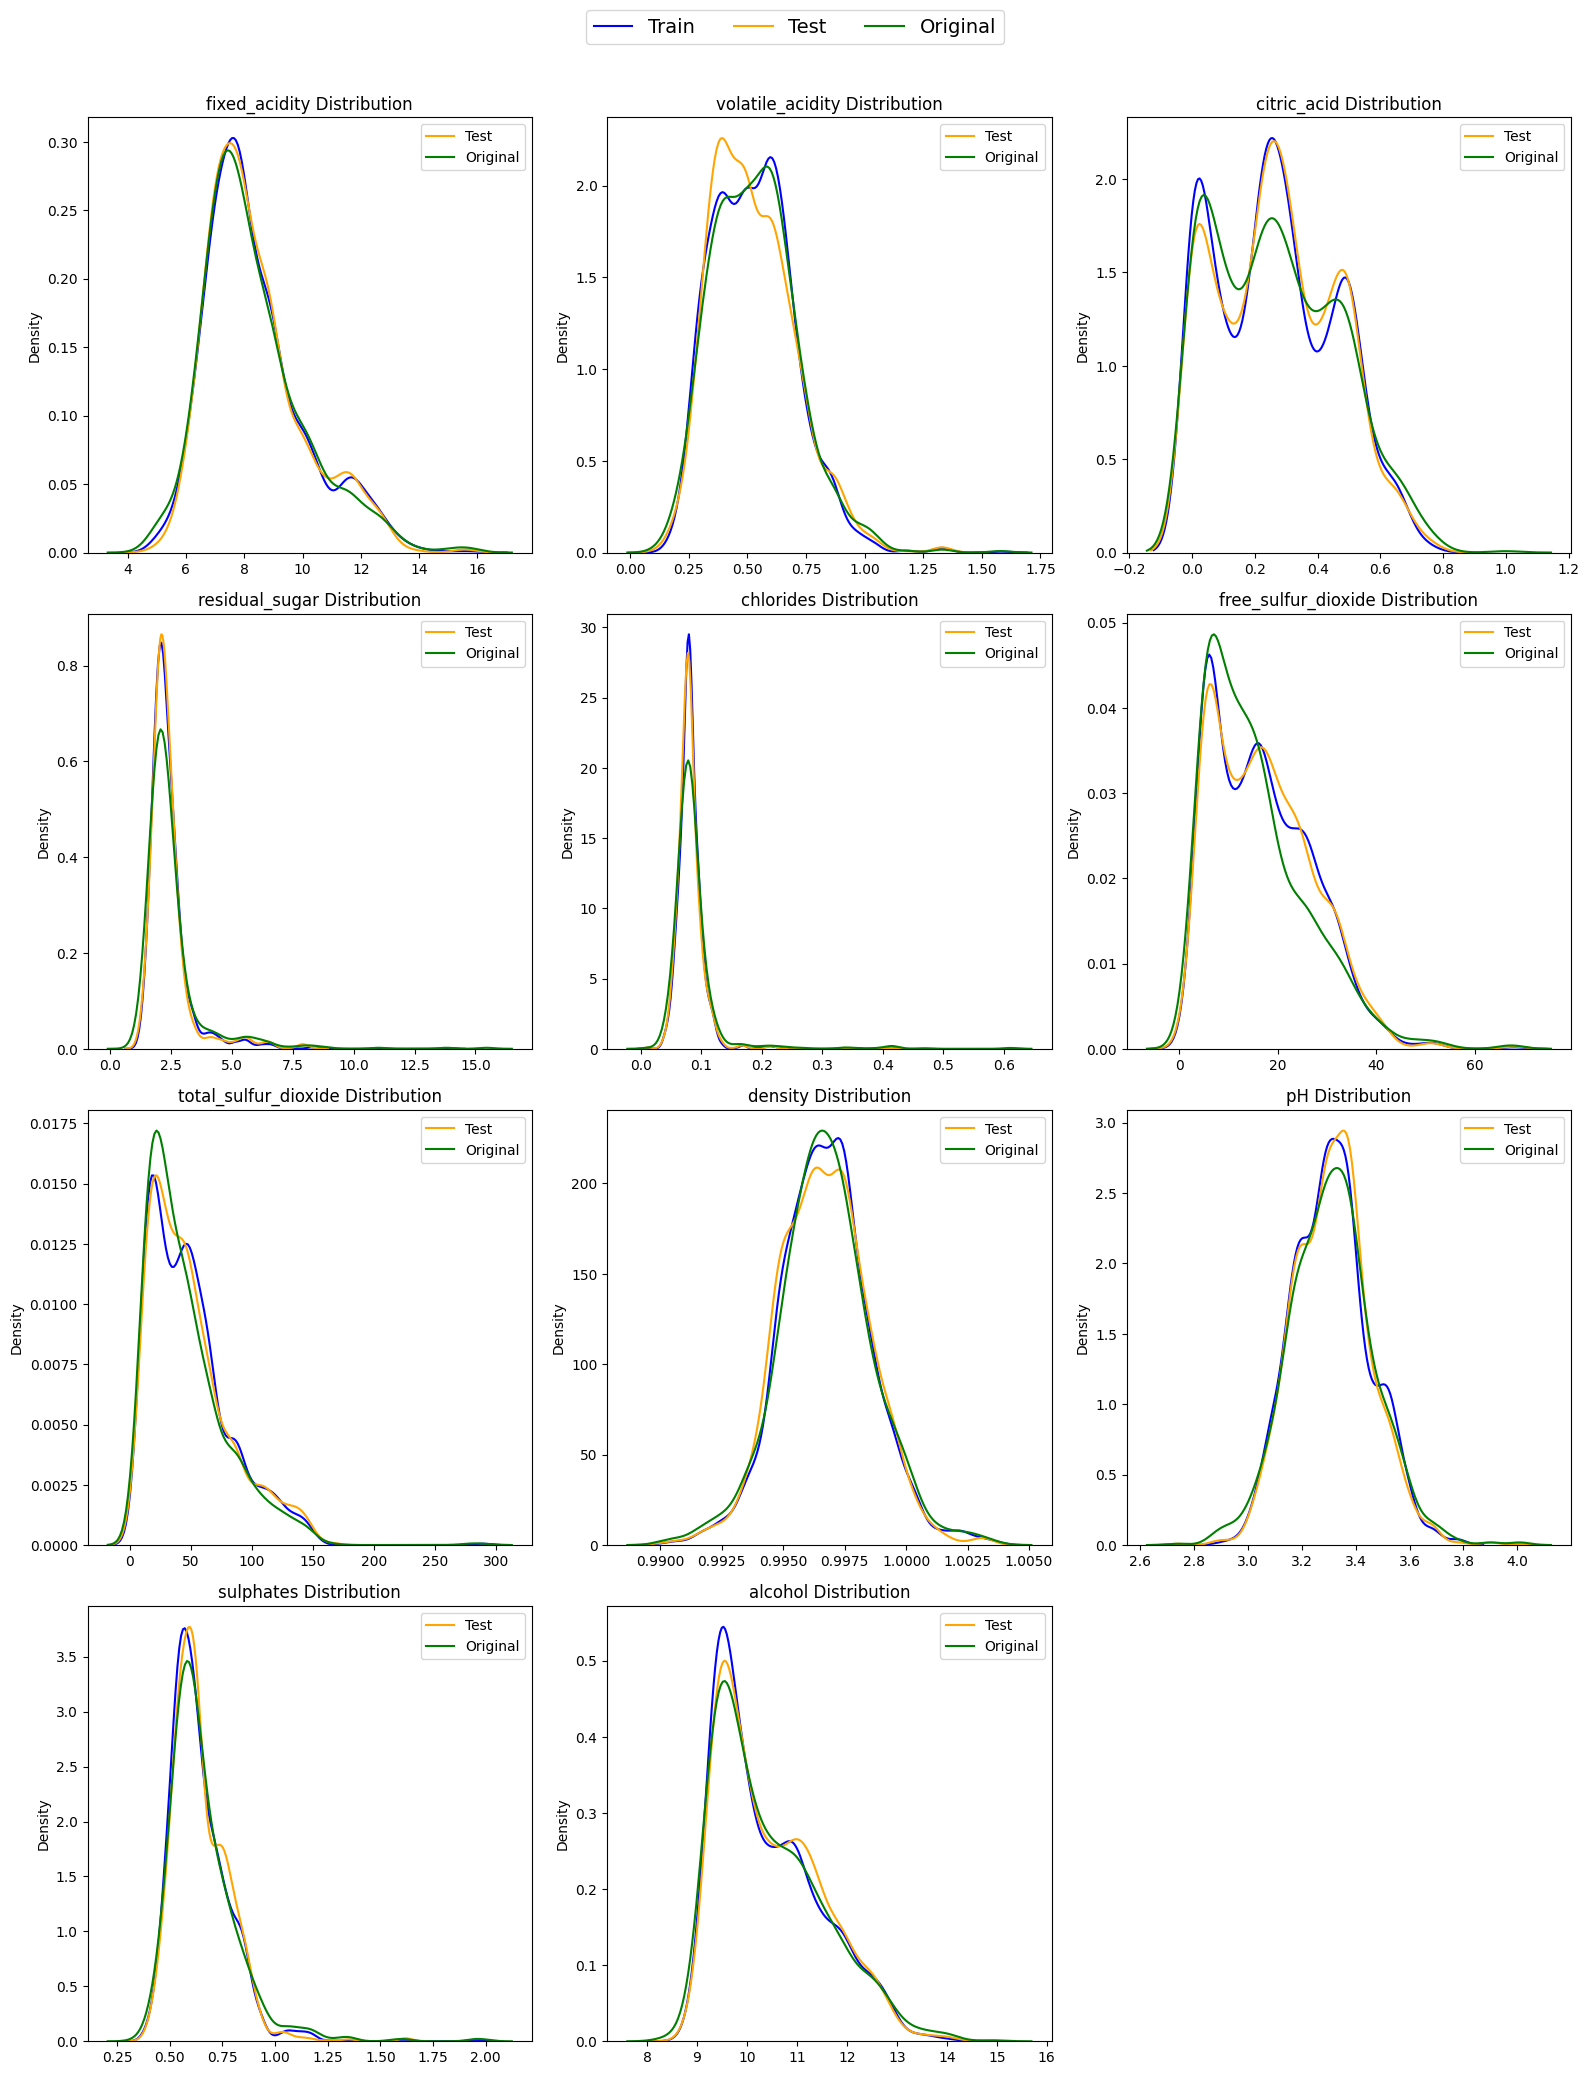

In [17]:
import math

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.kdeplot(train_df[column], label='Train', ax=ax[i], color='blue')
    sns.kdeplot(test_df[column], label='Test', ax=ax[i], color='orange')
    sns.kdeplot(original_df[column], label='Original', ax=ax[i], color='green')
    
    ax[i].set_title(f'{column} Distribution')
    ax[i].set_xlabel(None)
    
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles[1:], labels=labels[1:])
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=3)
plt.tight_layout()


### Train Vs Test vs Original

#### Insights:

* At first glance the only discernable difference lies in the distribution of free sulfur dioxide free sulfur dioxide. On the other hand train and test datasets does not reveal any substantial variations, suggesting that there is no need to conduct an extensive adversarial validation..
* The distributions of Chlorides and residual sugars exhibit a skewed pattern, which may require rectification through the use of the clip function. This technique can be especially beneficial for machine learning models that rely on feature scaling, as it can mitigate the impact of outliers on model performance.
* Concating original dataset is a good idea in this problem.

<ipython-input-26-0fd14822d7cb>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(
<ipython-input-26-0fd14822d7cb>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(
<ipython-input-26-0fd14822d7cb>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(
<ipython-input-26-0fd14822d7cb>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(
<ipython-input-26-0fd14822d7cb>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(
<ipython-input-26-0fd14822d7cb>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(
<ipython-input-26-0fd14822d7cb>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(
<ipython-input-26-0fd14822d7cb>:10: UserWarning: Ignoring `palette` because no `hue` variable has been a

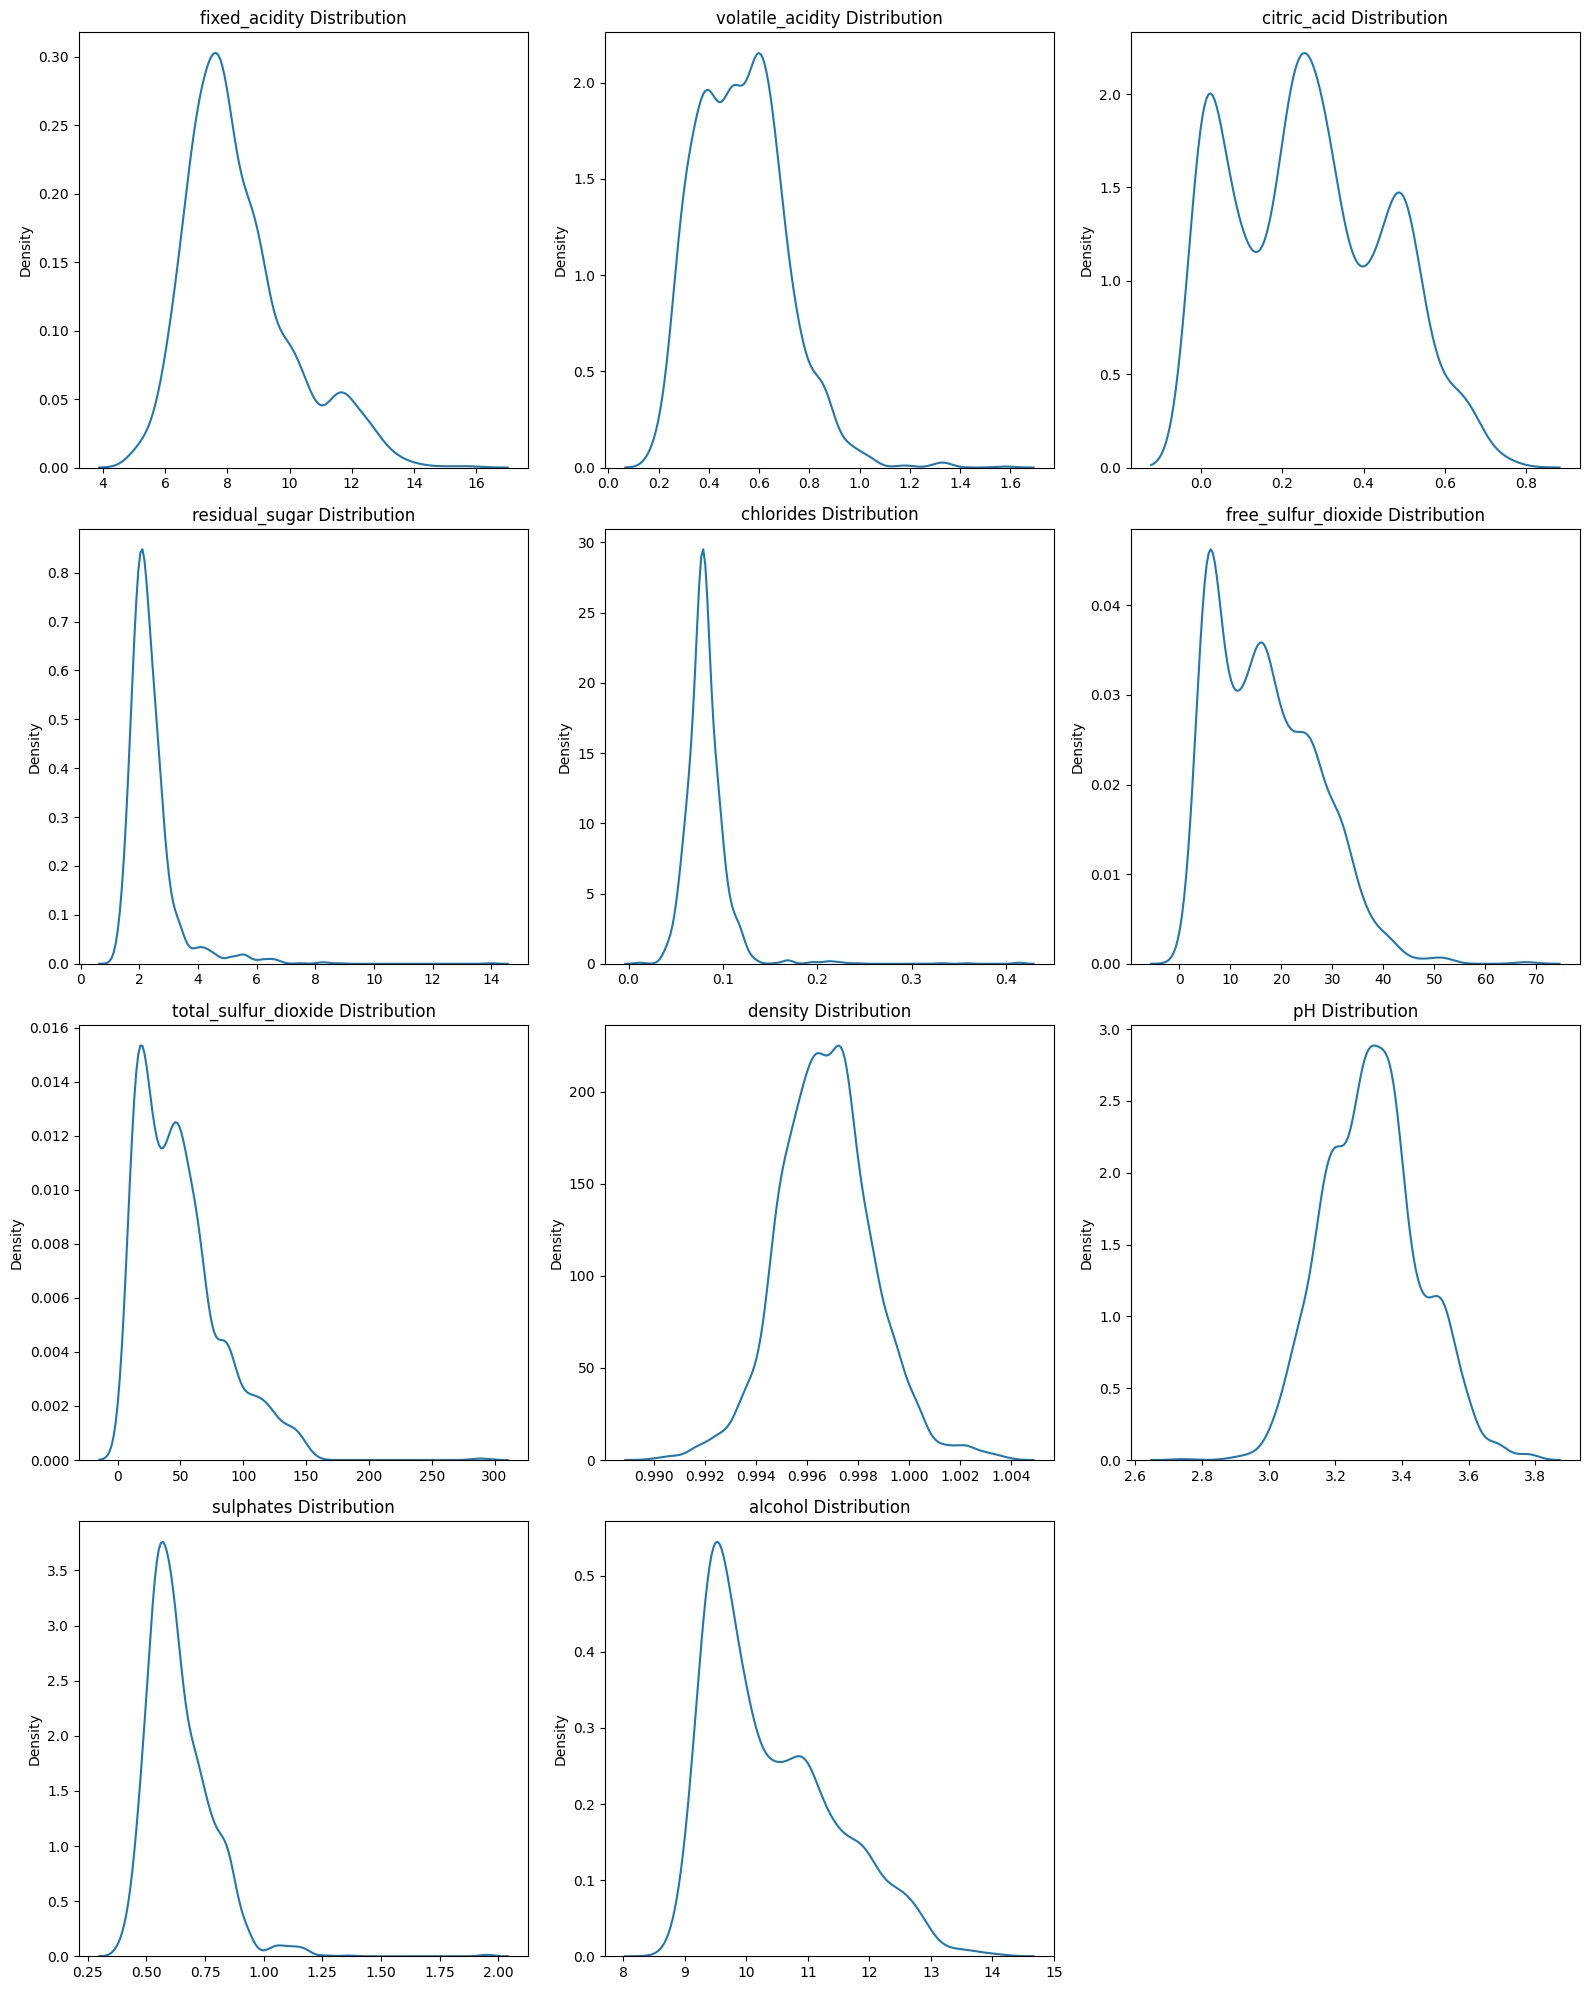

In [26]:
columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.kdeplot(
    data=train_df[column],
    #data=train_df.quality,
    ax=ax[i],
    palette="Purples_d"
)
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

plt.tight_layout()


### Box plots
Boxplots summarize key features of a dataset, including outliers, central tendency, distribution shape, and group comparisons. They are a valuable tool for exploratory data analysis, helping to quickly identify important features of the data.

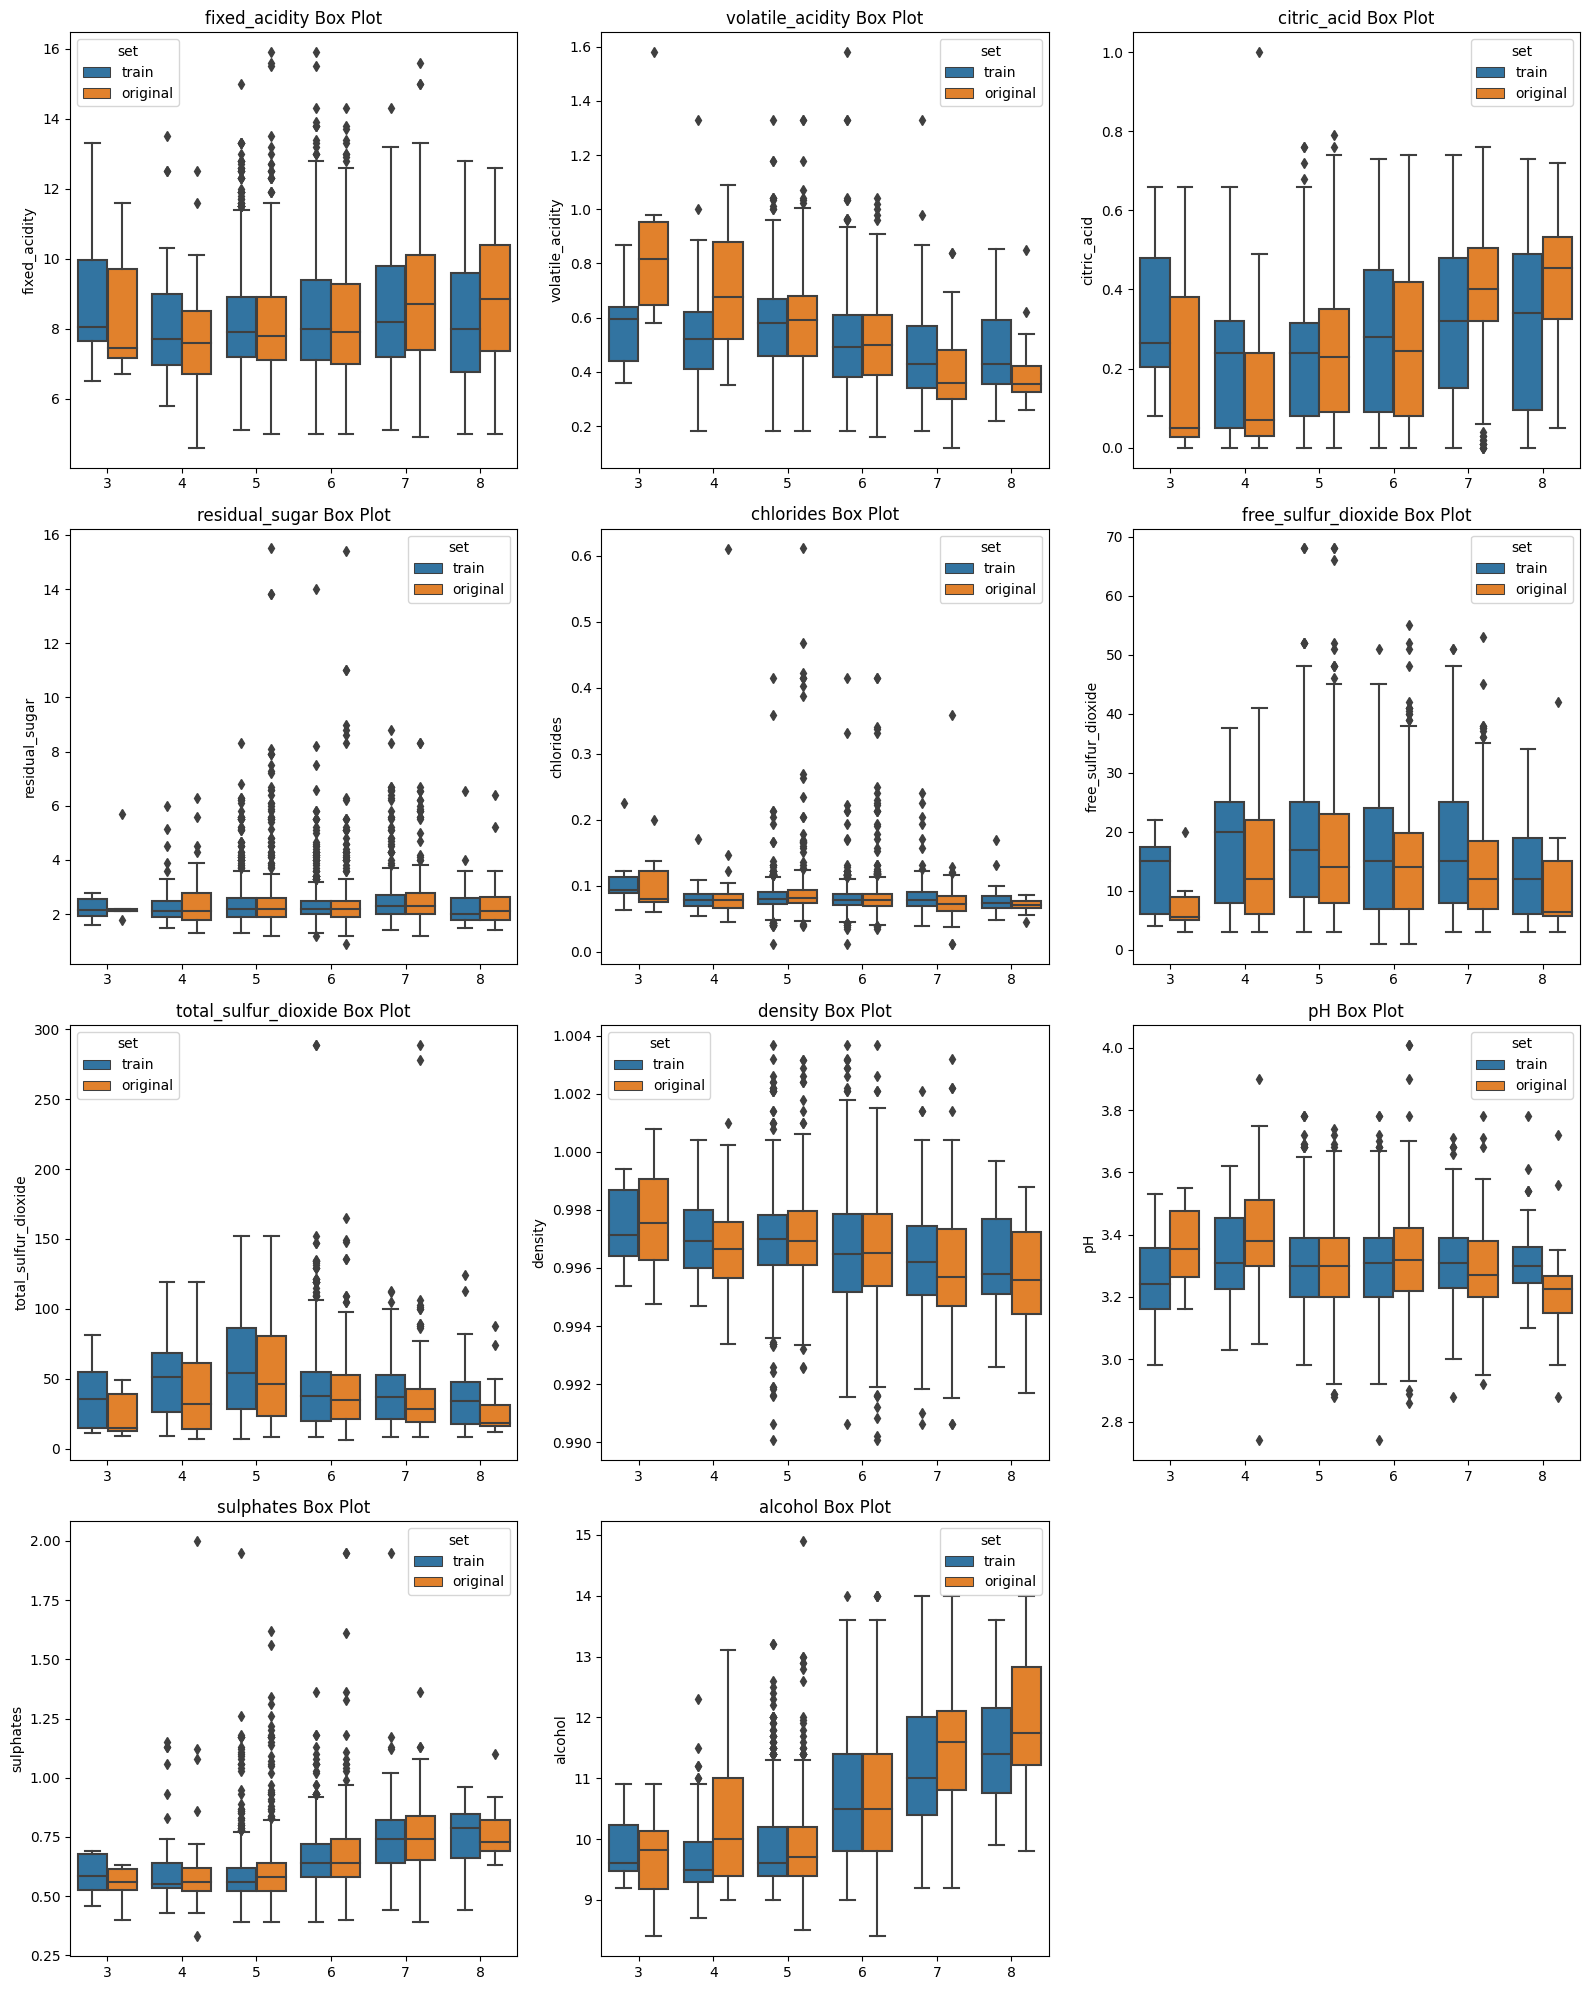

In [27]:
columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

total_df = pd.concat([train_df, original_df], axis=0)
total_df['set'] = 'original'
total_df.iloc[:train_df.shape[0], -1]  = 'train'


for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.boxplot(
        y=total_df[column],
        x=total_df.quality,
        hue=total_df.set,
        ax=ax[i],
    )
    
    # titles
    ax[i].set_title(f'{column} Box Plot');
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
plt.tight_layout()

#### Insights:

* Two features, alcohol and sulphates, have been identified as having a linear relationship with wine quality. This suggests that as the concentration of alcohol and sulphates in a wine increases, the quality of the wine tends to improve.
* On the other hand, density and volatile acidity has been identified as having an inverse relationship with wine quality. This suggests that as the density of a wine increases, the quality of the wine tends to decrease.
* Qualities 5 and 6 have more outliers than the rest of the categories. Maybe to clip features is a bad idea and it's better to either add an indicator feature or to use tree-based models.

<Axes: xlabel='quality', ylabel='alcohol'>

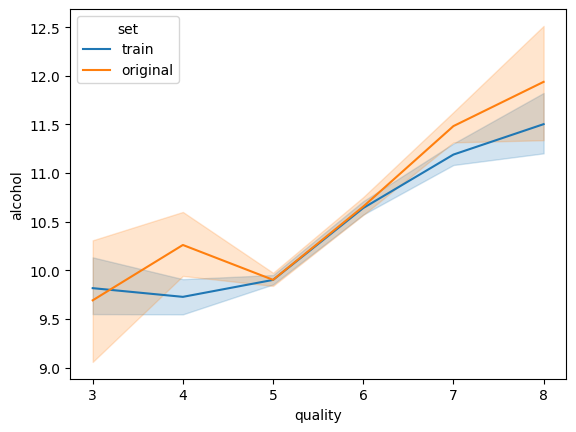

In [28]:
sns.lineplot(x=total_df.quality,y=total_df["alcohol"],hue=total_df.set)

<Axes: xlabel='quality', ylabel='sulphates'>

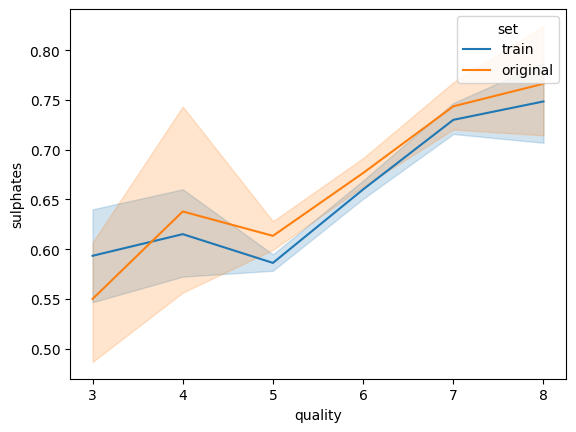

In [29]:
sns.lineplot(x=total_df.quality,y=total_df["sulphates"],hue=total_df.set)

### Outliers
The plot shows the results of counting all records in each group that have a z-score with an absolute value greater than 2, indicating outliers (observations more than 2 standard deviations from the mean).

<ipython-input-30-4924b4945e38>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores = z_scores.groupby(train_df.quality).apply(zscore)


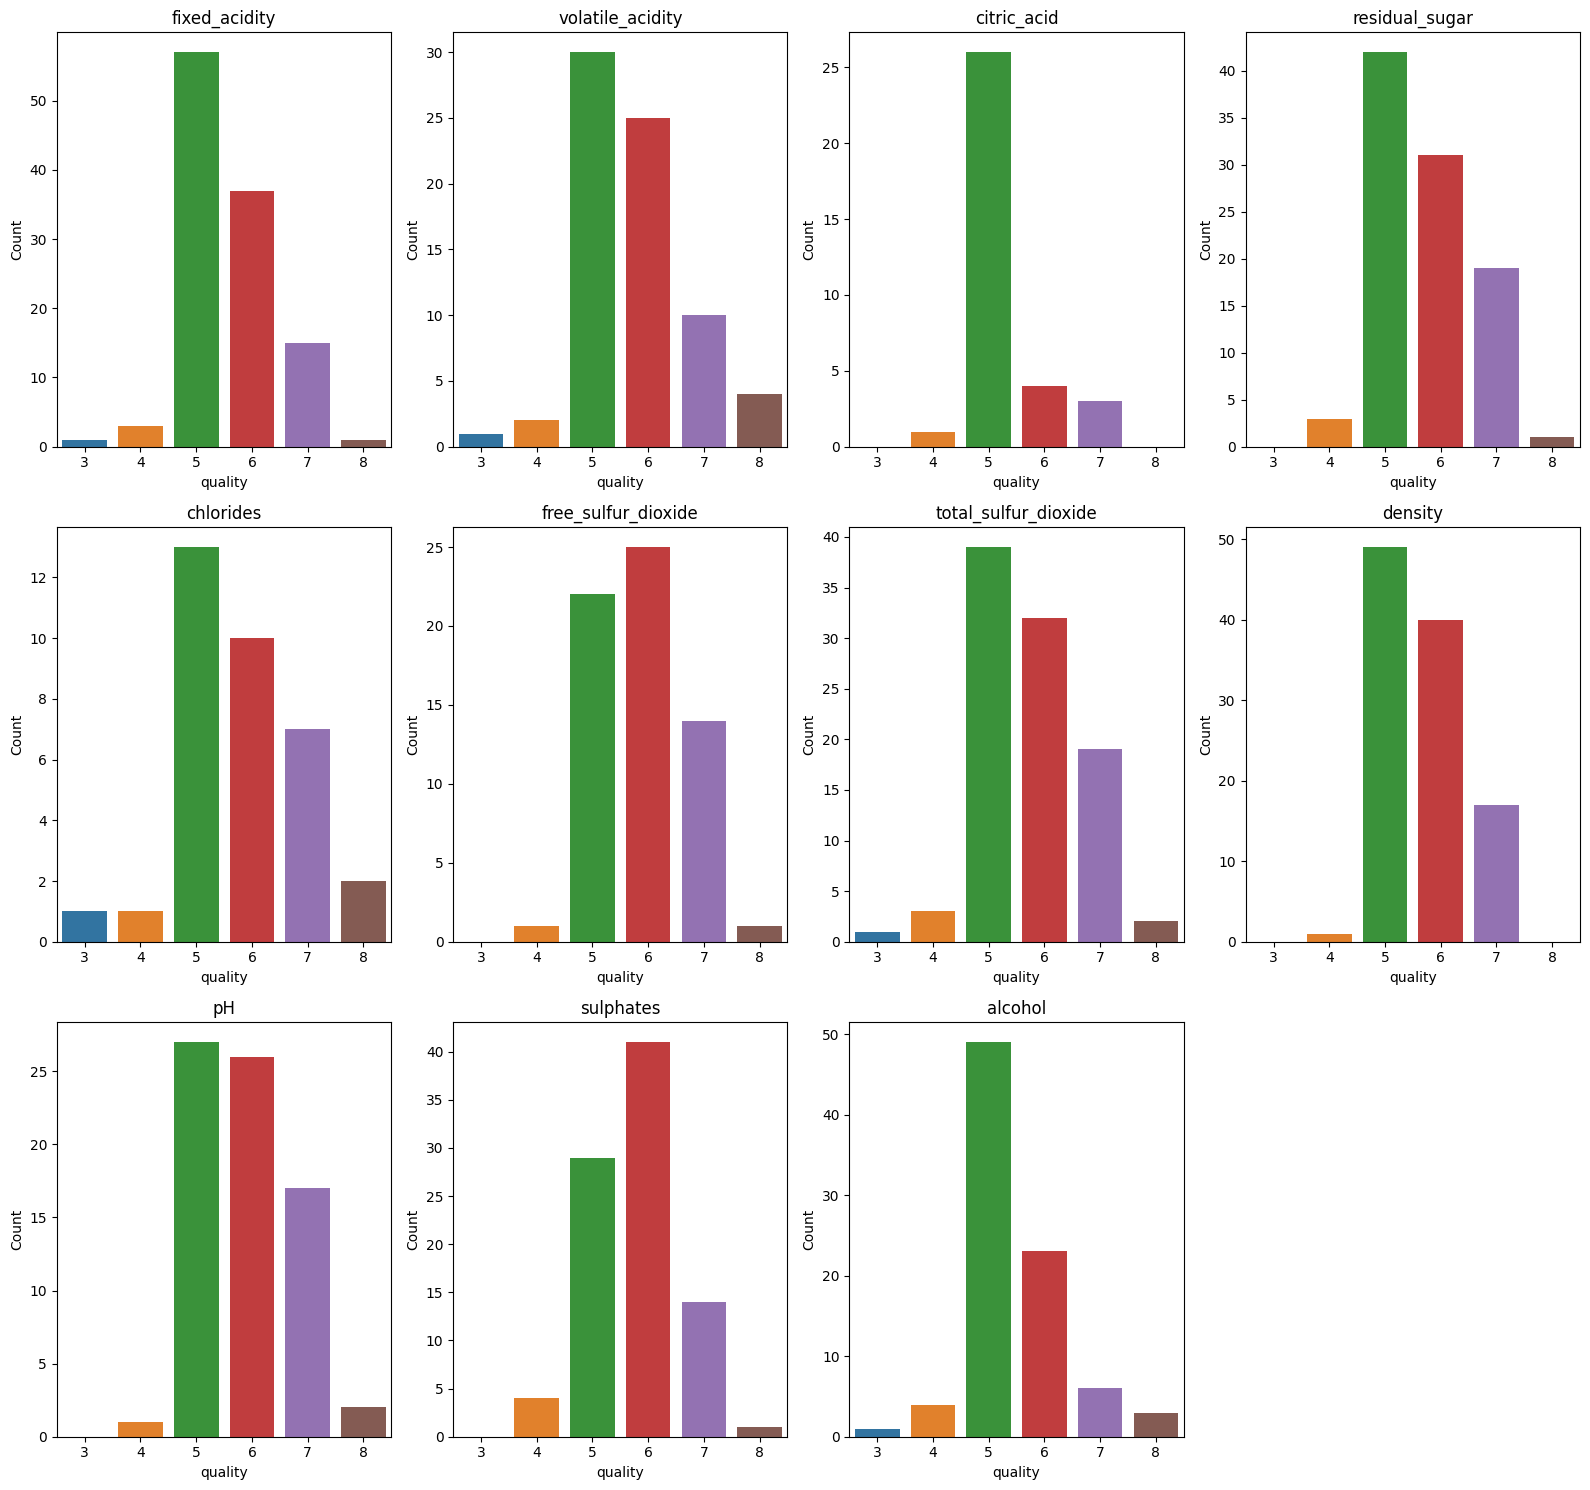

In [30]:
from scipy.stats import zscore

features = train_df.columns[:-1]
z_scores = train_df[features]
z_scores = z_scores.groupby(train_df.quality).apply(zscore)
outliers = z_scores.abs().ge(2).groupby(train_df.quality).sum()

n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.barplot(x=outliers.index, y=outliers[feature], ax=ax[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title(feature)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
plt.tight_layout()

#### Insights

* The retention of outliers is essential for accurately identifying values 5, 6, and 7 in features such as volatile acidity, citric acid, and density.
* In the other groups, the number of outliers is limited, and if the joint distributions per class are distinct, a basic linear model such as linear discriminant analysis (LDA) can be of great help.

### Checking for null values

In [31]:
train_null = train_df.isnull().sum().rename('train')
test_null = test_df.isnull().sum().rename('test')
original_null = original_df.isnull().sum().rename('original')

pd.concat([train_null, test_null, original_null], axis=1)

,train,test,original
fixed_acidity,0,0.0,0
volatile_acidity,0,0.0,0
citric_acid,0,0.0,0
residual_sugar,0,0.0,0
chlorides,0,0.0,0
free_sulfur_dioxide,0,0.0,0
total_sulfur_dioxide,0,0.0,0
density,0,0.0,0
pH,0,0.0,0
sulphates,0,0.0,0


#### Insights

* There are no null values, this competition won't involve any null filling technique. We can use directly any model out of the box.


### Correlation

<ipython-input-32-3b3515aad6d1>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1]);


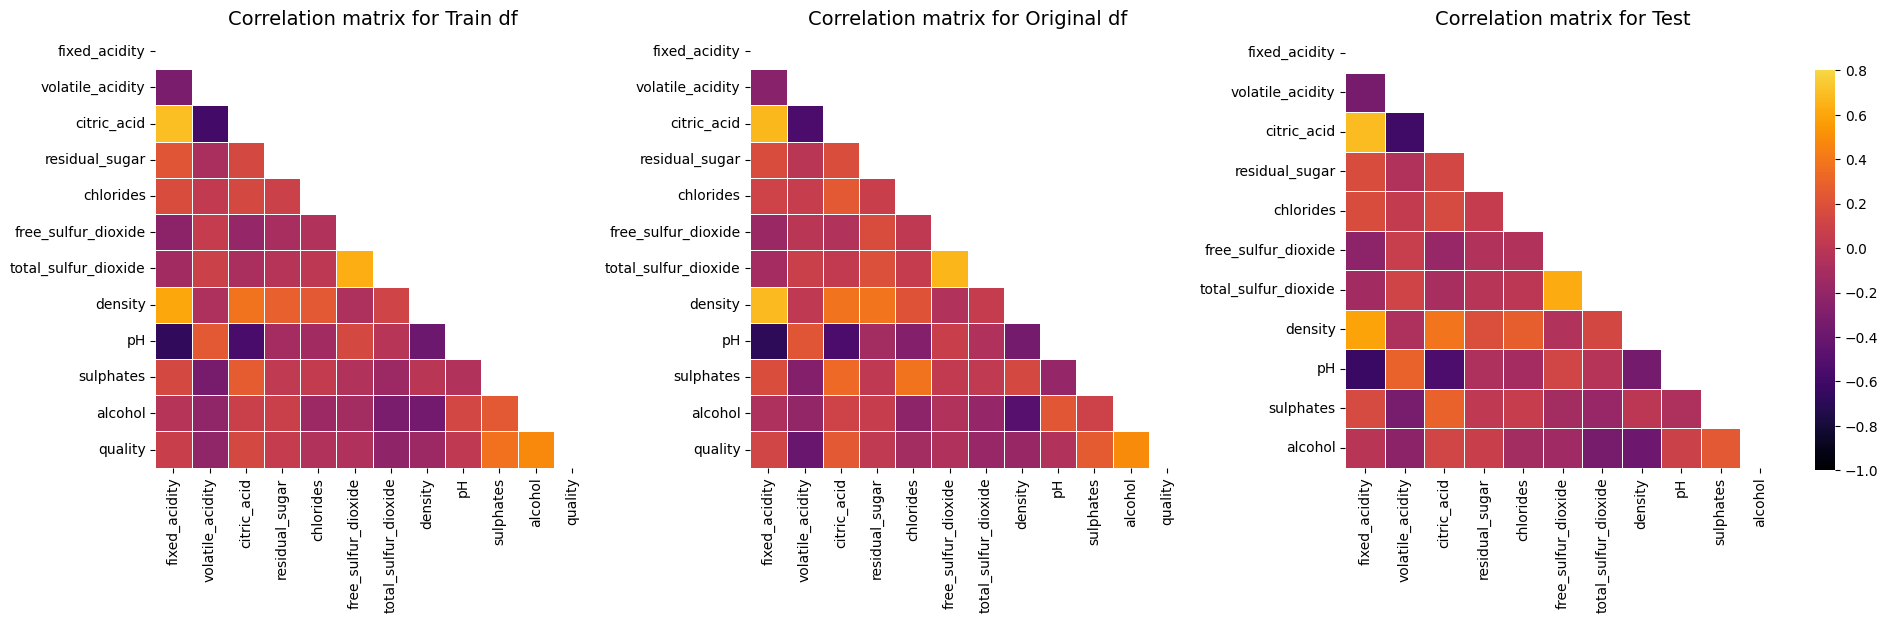

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
float_types = [np.int64, np.float16, np.float32, np.float64]
float_columns = train_df.select_dtypes(include=float_types).columns
cbar_ax = fig.add_axes([.91, .39, .01, .2])

names = ['Train', 'Original']
for i, df in enumerate([train_df, original_df]):
    
    corr = df[float_columns].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(
        corr, mask=mask, cmap='inferno',
        vmax=0.8, vmin=-1,
        center=0, annot=False, fmt='.3f',
        square=True, linewidths=.5,
        ax=ax[i],
        cbar=False,
        cbar_ax=None
    );

    ax[i].set_title(f'Correlation matrix for {names[i]} df', fontsize=14)

df = test_df
float_columns = test_df.select_dtypes(include=float_types).columns
corr = test_df[float_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr, mask=mask, cmap='inferno',
    vmax=0.8, vmin=-1,
    center=0, annot=False, fmt='.3f',
    square=True, linewidths=.5,
    cbar_kws={"shrink":.5, 'orientation':'vertical'},
    ax=ax[2],
    cbar=True,
    cbar_ax=cbar_ax
);
ax[2].set_title(f'Correlation matrix for Test', fontsize=14)
fig.tight_layout(rect=[0, 0, .9, 1]);

#### Insights:

* Correlations from train and original datasets are different.
* Pairwise correlation between features and Quality are similar between train and original dataset.

### Feature Engineering
To improve the performance of a model it is important to develop good features. To make good feature engineering it is important to perform a good EDA and familiarize yourself with the problem to extract good relationship between the features and the target variable. The insights gained from procedure allows us to create new features that better capture more complex relationships.



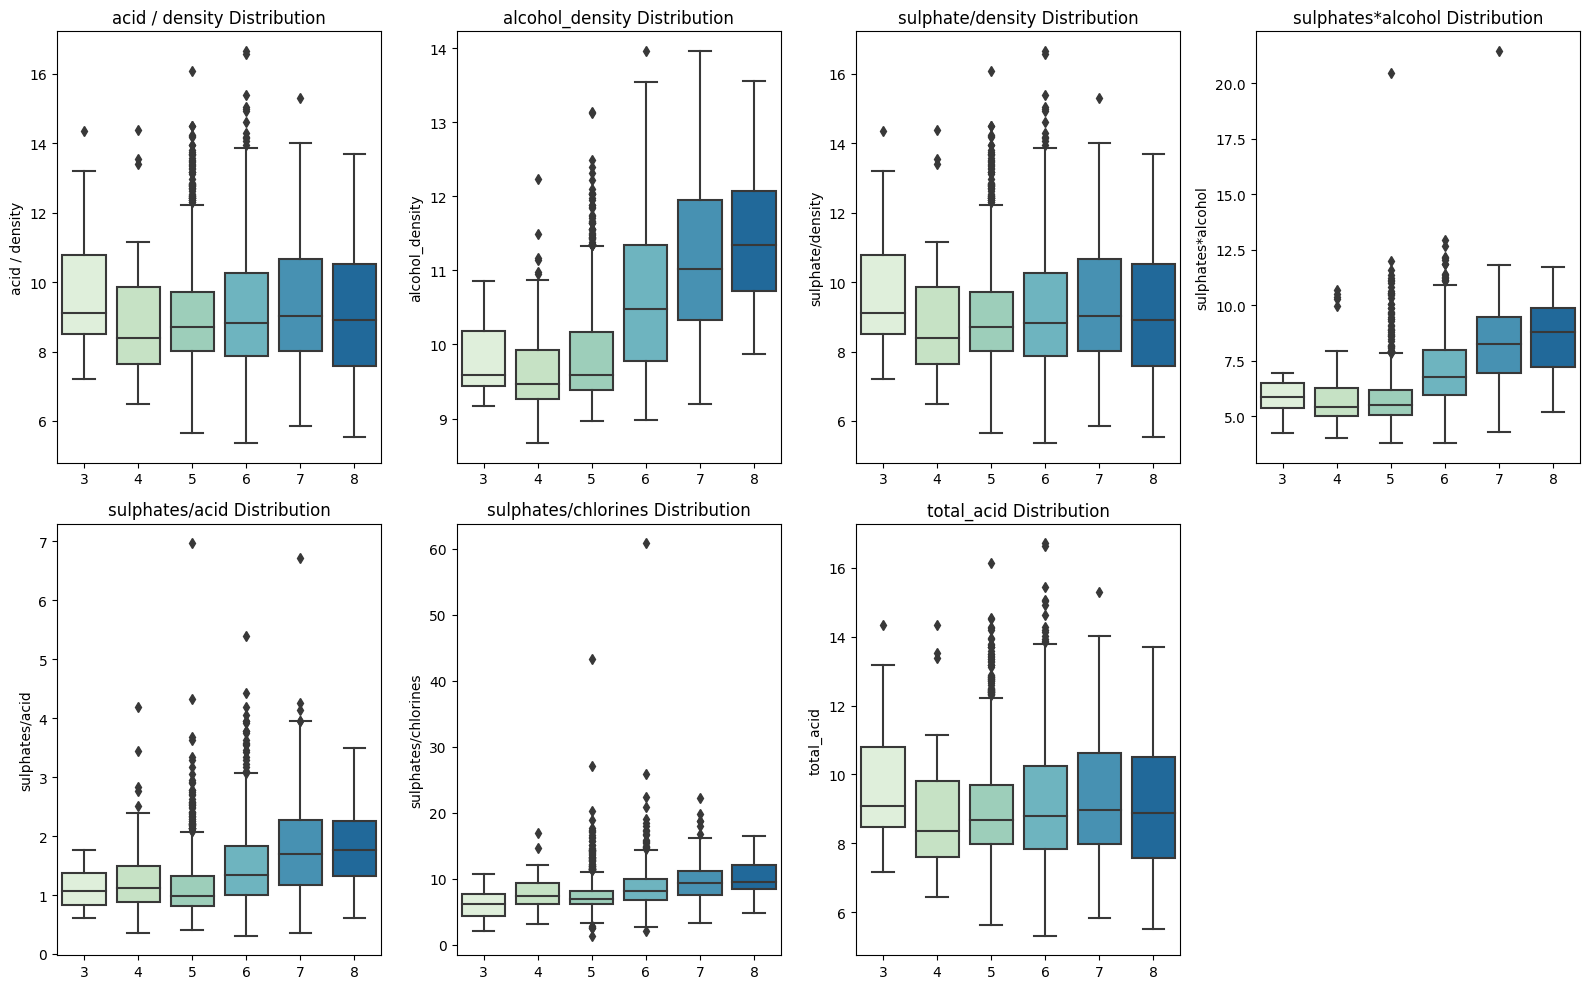

In [33]:
def FE(X):
    X['total_acid'] = X['fixed_acidity'] + X['volatile_acidity'] + X['citric_acid']
    X['acid / density'] = X['total_acid']  / X['density']
    X['alcohol_density'] = X['alcohol']  * X['density']
    X['sulphate/density'] = X['total_acid']  / X['density']
    X['sulphates/acid'] = X['sulphates'] / X['volatile_acidity']
    X['sulphates/chlorines'] = X['sulphates'] / X['chlorides']
    X['sulphates*alcohol'] = X['sulphates'] * X['alcohol']
    return X

X = train_df.copy()
X = FE(X)
new_cols = X.columns.difference(train_df.columns)

columns = new_cols
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.boxplot(
        y=X[column],
        x=X.quality,
        ax=ax[i],
        palette="GnBu"
    )
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

plt.tight_layout()

### Basic Model

In [35]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from colorama import Fore,Style
from datetime import datetime,timedelta

cv = StratifiedKFold(5, shuffle=True, random_state=42)
X = train_df[features]
y = train_df.quality
timedel=timedelta()
kappas = []
test_preds = []
models = []
oof_preds = pd.Series(0, index=train_df.index)
start=time.time()

for fold, (tr_ix, vl_ix) in enumerate(cv.split(train_df, train_df.quality)):
    start_fold = time.time()
    X_tr, y_tr = X.loc[tr_ix].copy(), y.loc[tr_ix]
    X_vl, y_vl = X.loc[vl_ix].copy(), y.loc[vl_ix]
    
    # concat orginal df
    X_tr = pd.concat([X_tr, original_df[features]])
    y_tr = pd.concat([y_tr, original_df.quality])
    
    X_tr = FE(X_tr)
    X_vl = FE(X_vl)
    
    model = LGBMClassifier(max_depth=4, random_state=42, class_weight='balanced')
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_vl)
    oof_preds.iloc[vl_ix] = y_pred
    kappas.append(cohen_kappa_score(y_vl, y_pred, weights='quadratic'))
    models.append(model)
    
    
    
print(f'Mean Quadratic Kappa:  {Fore.GREEN}{np.mean(kappas)}{Style.RESET_ALL}')

Mean Quadratic Kappa:  0.487035349323918


In [37]:
from lightgbm import LGBMRegressor
import scipy as sp
from functools import partial

qwk = partial(cohen_kappa_score, weights='quadratic')
class LGBMRegressorWithRounder(LGBMRegressor):
    '''
    A light wrapper over LGBMRegressor to deal with the usual problems.
    '''
    def _kappa_loss(self, coef, X, y):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 3
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 4
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 5
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 6
            elif pred >= coef[3] and pred < coef[4]:
                X_p[i] = 7
            else:
                X_p[i] = 8

        ll = qwk(y, X_p)
        return -ll
    
    def fit(self, X, y, **params):
        super().fit(X, y, **params)
        X_pred = super().predict(X)
        loss_partial = partial(self._kappa_loss, X=X_pred, y=y)
        # a little bit of wobble
        initial_coef = list(
            np.array([3.5, 4.5, 5.5, 6.5, 7.5])
        )
        self.round_coef_ = sp.optimize.minimize(loss_partial, initial_coef, method='nelder-mead')
        return self
    
    def set_params(self, **params):
        self.round_coef_ = None
        
    def predict_discrete(self, X):
        coef = self.coefficients()
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 3
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 4
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 5
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 6
            elif pred >= coef[3] and pred < coef[4]:
                X_p[i] = 7
            else:
                X_p[i] = 8
        return X_p.astype('int')

    def coefficients(self):
        return self.round_coef_['x']
    
    def predict(self, X):
        X_pred = super().predict(X)
        return self.predict_discrete(X_pred)

### Regressor Baseline

In [38]:
cv = StratifiedKFold(5, shuffle=True, random_state=42)
X = train_df[features]
y = train_df.quality

kappas = []
test_preds = []
models = []
oof_preds = pd.Series(0, index=train_df.index)


for fold, (tr_ix, vl_ix) in enumerate(cv.split(train_df, train_df.quality)):
    
    X_tr, y_tr = X.loc[tr_ix], y.loc[tr_ix]
    X_vl, y_vl = X.loc[vl_ix], y.loc[vl_ix]
    
    # concat orginal df
    X_tr = pd.concat([X_tr, original_df[features]])
    y_tr = pd.concat([y_tr, original_df.quality])
    
    X_tr = FE(X_tr)
    X_vl = FE(X_vl)
    
    model = LGBMRegressorWithRounder(max_depth=4, random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_vl)
    oof_preds.iloc[vl_ix] = y_pred
    kappas.append(cohen_kappa_score(y_vl, y_pred, weights='quadratic'))
    models.append(model)
    
    print('_' * 30)
    print(f'Fold: {fold}')
    print(f'Quadratic Kappa  : ', kappas[-1])
    
    print()
    
print(f'Mean Quadratic Kappa:  {Fore.GREEN}{np.mean(kappas)}{Style.RESET_ALL}')

______________________________
Fold: 0
Quadratic Kappa  :  0.5191173579712995

______________________________
Fold: 1
Quadratic Kappa  :  0.5368944642237445

______________________________
Fold: 2
Quadratic Kappa  :  0.5378509772794919

______________________________
Fold: 3
Quadratic Kappa  :  0.5662817672812266

______________________________
Fold: 4
Quadratic Kappa  :  0.5485388965110465

Mean Quadratic Kappa:  0.5417366926533618


### Confusion_Matrix

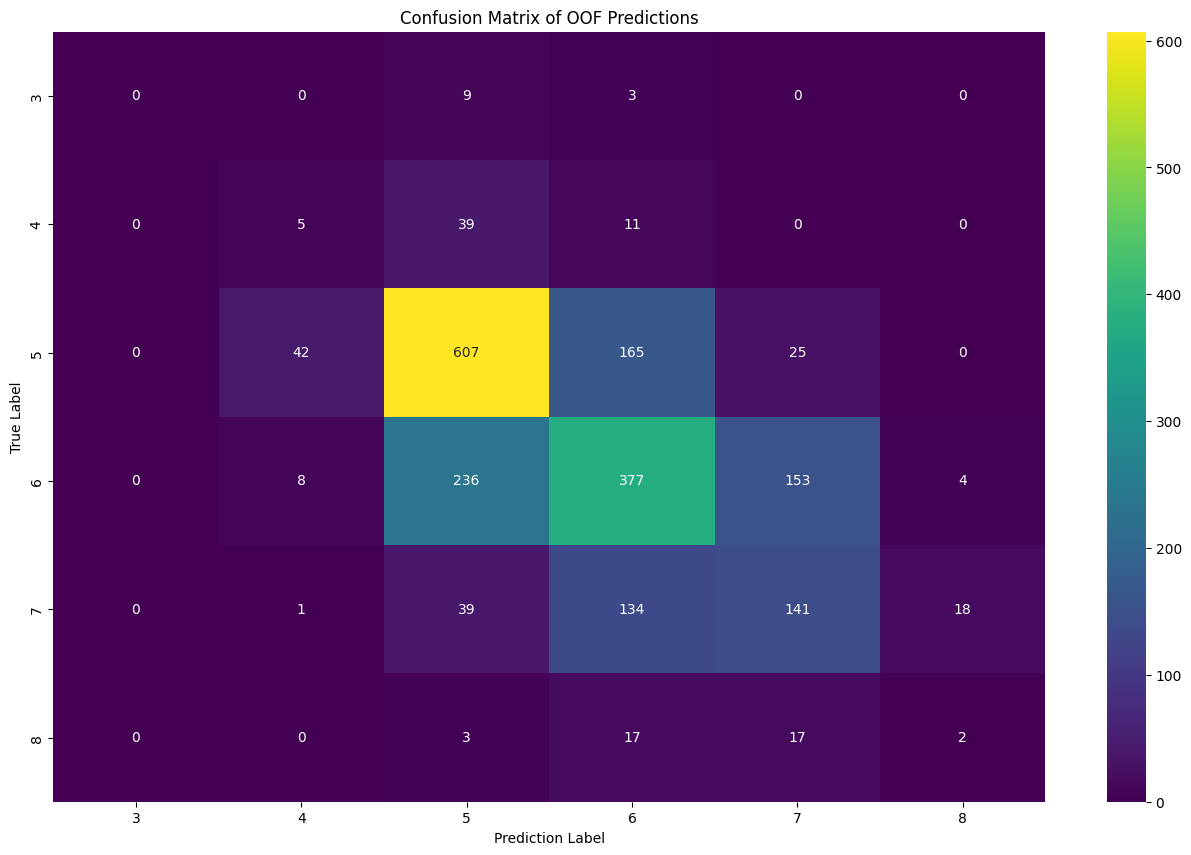

In [39]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(
    confusion_matrix(train_df.quality, oof_preds),
    annot=True,
    cmap='viridis',
    fmt='',
    ax=ax
);

qualities = np.sort(train_df.quality.unique())
ax.set_xticklabels(qualities)
ax.set_yticklabels(qualities)
ax.set_ylabel('True Label')
ax.set_xlabel('Prediction Label')
ax.set_title('Confusion Matrix of OOF Predictions');

LGBM is making lots of mistakes trying to separate class 5 from class 6, we could just train a model to separate this two classe and use it in a second step stacking. Class 3 is incorrectly classified all the times.

In [40]:
### Submit Predictions

# Generate fold prediction
test_preds = {i: model.predict(FE(test_df)) for i, model in enumerate(models)}
test_preds = pd.DataFrame(test_preds)

# Set the correct index
test_preds.set_index(test_df.index, inplace=True)

# Use the mode as ensembling
test_preds = test_preds.mode(axis=1)[0].astype(int)
test_preds.rename('quality', inplace=True)
test_preds.to_csv('submssion.csv')